### 算法流程
K-Means聚类首先随机确定 K 个初始点作为质心（这也是K-Means聚类的一个问题，这个K值的不合理选择会使得模型不适应和解释性差）。然后将数据集中的每个点分配到一个簇中， 具体来讲，就是为每个点找到距其最近的质心（这里算的为欧式距离，当然也可以使用其他距离）， 并将其分配该质心所对应的簇；这一步完成之后，每个簇的质心更新为该簇所有点的平均值；重复上述过程直到数据集中的所有点都距离它所对应的质心最近时结束。


### 导入数据 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

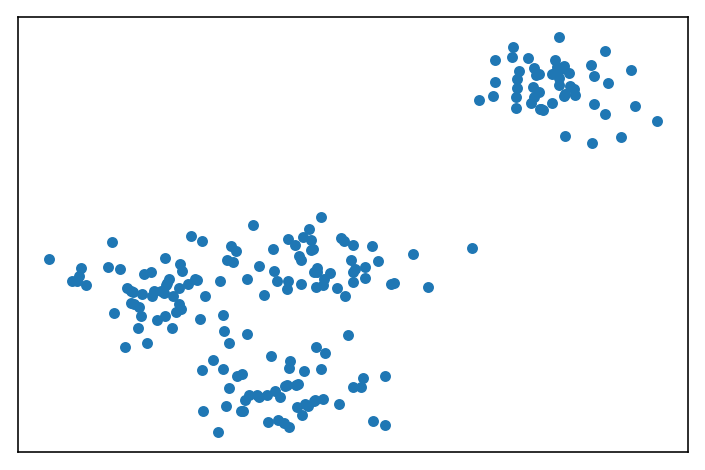

In [3]:
plt.figure(figsize=(6,4), dpi=144)
plt.xticks(())
plt.yticks(())
plt.scatter(X[:, 0], X[:, 1], s=20, marker='o')

In [4]:
from sklearn.cluster import KMeans

n_clusters = 3
kmean = KMeans(n_clusters=n_clusters)
kmean.fit(X);
print("kmean: k={}, cost={}".format(n_clusters, int(kmean.score(X))))

kmean: k=3, cost=-668


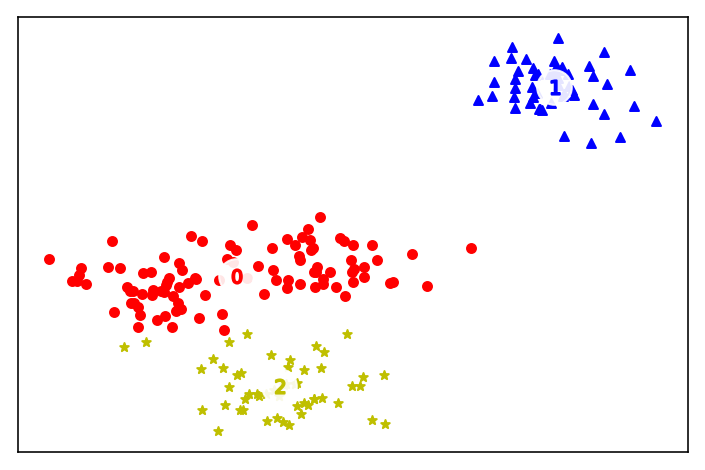

In [5]:
labels = kmean.labels_
centers = kmean.cluster_centers_
markers = ['o', '^', '*']
colors = ['r', 'b', 'y']

plt.figure(figsize=(6,4), dpi=144)
plt.xticks(())
plt.yticks(())

# 画样本
for c in range(n_clusters):
    cluster = X[labels == c]
    plt.scatter(cluster[:, 0], cluster[:, 1], 
                marker=markers[c], s=20, c=colors[c])
# 画出中心点
plt.scatter(centers[:, 0], centers[:, 1],
            marker='o', c="white", alpha=0.9, s=300)
for i, c in enumerate(centers):
    plt.scatter(c[0], c[1], marker='$%d$' % i, s=50, c=colors[i])